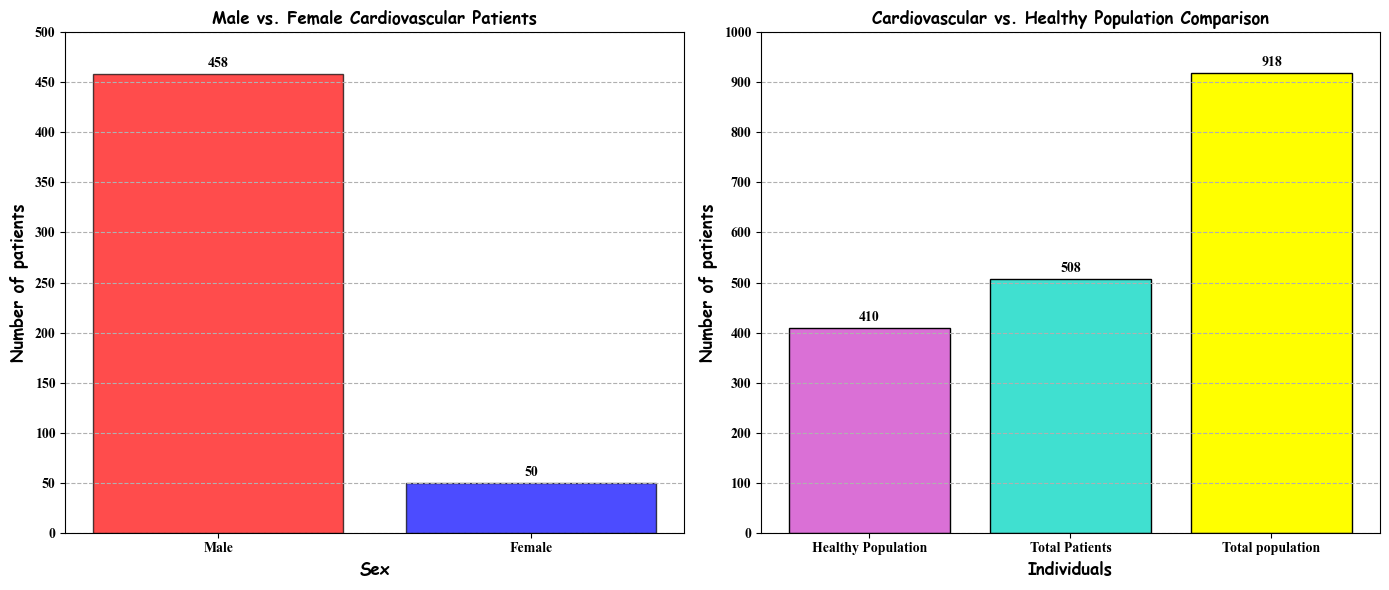

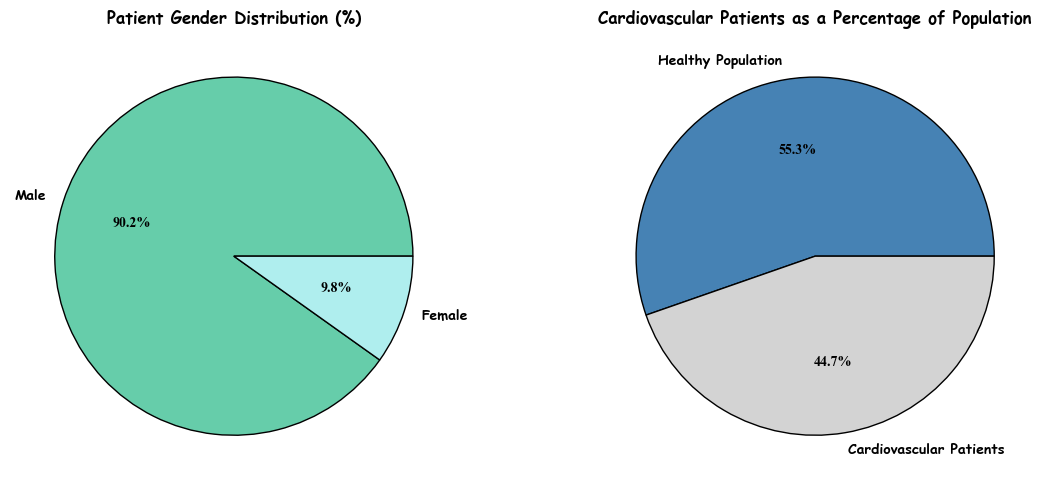

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


""" 
Classify cardiovascular patients
based on Sex (Male and Female),
SECTION ONE
"""

# Load the Dataframe
df = pd.read_csv("../data/heart-data.csv")


# Count the number of cardiovascular patients
filterd = df[df["HeartDisease"] == 1]
sex_counts = filterd["Sex"].value_counts()
male = sex_counts.get("M", 0)
female = sex_counts.get("F", 0)
total = male + female

# Calculate the precentages of cardiovascular patients
Mpct, Fpct = (male * 100 / total), (female * 100 / total)
total_precentage = total * 100 / df["Sex"].count()

# make the new Dataframe for number of cardiovascular patients
df_of_patients_num = pd.DataFrame({"Sex": ["M", "F"],
                                   "Number of cardiovascular patients": [male, female],
                                   "Total": total, "Percentage of patients by sex": [Mpct, Fpct],
                                   "Total percentage of patients": total_precentage})


"""
Customize some properties of visualizations
"""

title = {"fontname": "Comic Sans MS", "fontweight": "bold", "fontsize": 12}
labels = {"fontname": "Times New Roman", "fontweight": "bold"}

                  
"""
Create the visualizations, 
SECTION ONE
"""
# Bar chart1, show the Comparison bars of male and female patients
def barChart1(ax, title, labels):
    # Set plot1
    ax.bar(
        df_of_patients_num["Sex"], 
        df_of_patients_num["Number of cardiovascular patients"],
        color=["red", "blue"], edgecolor="black", alpha=0.7
        )
    ax.set_title("Male vs. Female Cardiovascular Patients", fontdict=title)
    ax.set_xlabel("Sex", fontdict=title)
    ax.set_ylabel("Number of patients", fontdict=title)
    ax.set_yticks(np.arange(550, step=50))
    ax.set_yticklabels(np.arange(550, step=50), fontdict=labels)
    ax.grid(axis="y", linestyle="--")
    
    # Adjust font and style of x tick labels
    ax.set_xticks(range(len(["Male", "Female"])))
    ax.set_xticklabels(["Male", "Female"])

    for l in ax.get_xticklabels():
        l.set_fontname("Times New Roman")
        l.set_fontweight("bold")

    # Annotate the exact counts in plot1
    for i in range(len(df_of_patients_num)):
        s = df_of_patients_num["Sex"][i]
        n = df_of_patients_num["Number of cardiovascular patients"][i]
        ax.annotate(n, xy=(s, n), xytext=(0, 5), textcoords="offset points", ha="center",
                        fontname="Times New Roman", fontweight="bold")


# Bar chart2, show the Comparison bars of total heart disease patients vs total population
def barChart2(ax, title, labels):
    # Set plot2
    x = ["Healthy Population", "Total Patients", "Total population"]
    y = [(df["Sex"].count() - df_of_patients_num.iloc[0, 2]),
        df_of_patients_num.iloc[0, 2],
        df["Sex"].count()]
    ax.bar(x, y, color=["orchid", "turquoise", "yellow"], edgecolor="black")
    ax.set_title("Cardiovascular vs. Healthy Population Comparison", fontdict=title)
    ax.set_xlabel("Individuals", fontdict=title)
    ax.set_ylabel("Number of patients", fontdict=title)
    ax.set_yticks(np.arange(1050, step=100))
    ax.set_yticklabels(np.arange(1050, step=100), fontdict=labels)
    ax.grid(axis="y", linestyle="--")
    
    # Adjust font and style of x tick labels
    ax.set_xticks(range(len(x)))
    ax.set_xticklabels(x)

    for l in ax.get_xticklabels():
        l.set_fontname("Times New Roman")
        l.set_fontweight("bold")
                    
    # Annotate the exact counts in plot2
    for i, v in enumerate(y):
        ax.annotate(v, xy=(x[i], y[i]), xytext=(0, 5), textcoords="offset points", ha="center",
                        fontname="Times New Roman", fontweight="bold")
   


# Pie chart1, Show the percentage of male vs female patients out of all cardiovascular patients
def pieChart1(ax, title):
    wedges1, texts1, autotexts1 = ax.pie(df_of_patients_num["Number of cardiovascular patients"],
                labels=["Male", "Female"], autopct="%1.1f%%", colors=["mediumaquamarine", "paleturquoise"])
    for w1 in wedges1:
        w1.set_edgecolor("black")

    for t1 in texts1:
        t1.set_fontname("Comic Sans MS")
        t1.set_fontweight("bold")
    
    for a1 in autotexts1:
        a1.set_fontname("Times New Roman")
        a1.set_fontweight("bold")

    ax.set_title("Patient Gender Distribution (%)", fontdict=title) 


#Pie chart2, Show the percentage of cardiovascular patients out of all population
def pieChart2(ax, title):
    wedges2, texts2, autotexts2 = ax.pie([df_of_patients_num["Total"][0],
                                (df.shape[0] - df_of_patients_num["Total"][0])],
                            labels=["Healthy Population", "Cardiovascular Patients"],
                        autopct="%1.1f%%", colors=["steelblue", "lightgray"])
    for w2 in wedges2:
        w2.set_edgecolor("black")

    for t2 in texts2:
        t2.set_fontname("Comic Sans MS")
        t2.set_fontweight("bold")

    for a2 in autotexts2:
        a2.set_fontname("Times New Roman")
        a2.set_fontweight("bold")

    ax.set_title("Cardiovascular Patients as a Percentage of Population", fontdict=title) 

# Save the table
#df_of_patients_num.to_csv(...)

# Set, Run and Show bar charts
fig1, axs1 = plt.subplots(1, 2, figsize=[14, 6])
barChart1(axs1[0], title, labels)
barChart2(axs1[1], title, labels)
plt.tight_layout()
#plt.savefig(...)
plt.show()

# Set, Run and Show pie charts
fig2, axs2 = plt.subplots(1, 2, figsize=[12, 5])
pieChart1(axs2[0], title)
pieChart2(axs2[1], title)
plt.setp(axs2, aspect="equal")
plt.tight_layout()
#plt.savefig(...)
plt.show()
